In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
np.random.multivariate_normal? #it is used for show for multidimantional goesyen 

SyntaxError: invalid syntax (891180821.py, line 1)

In [30]:
mean_1= np.array([5,10])
cov_1 = np.array([[1,2],[1,0.2]])

In [31]:
mean_2= np.array([0,0])
cov_2 = np.array([[1,0.2],[0.2,1]])

In [32]:
dist_1 = np.random.multivariate_normal(mean_1,cov_1,1000)
dist_2 = np.random.multivariate_normal(mean_2,cov_2,1000)

C:\Users\mousa\AppData\Local\Temp\ipykernel_15656\4281525065.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1,cov_1,1000)


In [33]:
print(dist_1.shape,dist_2.shape)

(1000, 2) (1000, 2)


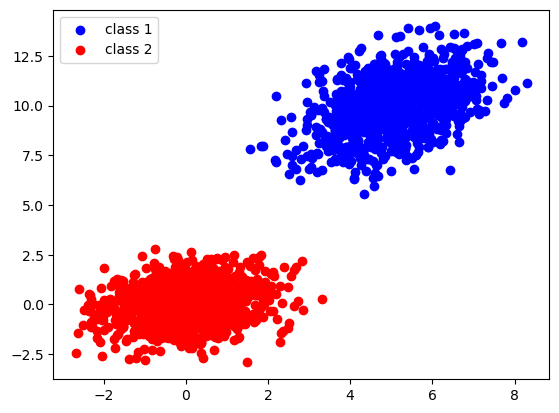

In [34]:
plt.scatter(dist_1[:,0],dist_1[:,1],c='blue',label ='class 1')
plt.scatter(dist_2[:,0],dist_2[:,1],c='red',label ='class 2')
plt.legend()

In [35]:
dataset = np.zeros((2000,3))
print(dataset.shape)
dataset[:1000,:2]=dist_1
dataset[1000:,:2]=dist_2

(2000, 3)


In [36]:
dataset[:1000,-1]=1
print(dataset)

[[ 5.51231913 10.93864366  1.        ]
 [ 5.61520238  9.5527618   1.        ]
 [ 4.26204064  7.00044604  1.        ]
 ...
 [-0.39845876 -0.84529322  0.        ]
 [-0.80604855 -0.44262254  0.        ]
 [-1.07578315  0.9960678   0.        ]]


In [37]:
np.random.shuffle(dataset)

In [38]:
dataset

array([[ 4.47537705,  8.49120741,  1.        ],
       [-0.41399254, -1.02414859,  0.        ],
       [ 6.85387076, 10.56229189,  1.        ],
       ...,
       [ 4.10460792,  9.16869657,  1.        ],
       [ 0.13988653, -0.9923427 ,  0.        ],
       [ 7.36245927, 12.65472064,  1.        ]])

In [39]:
split = 0.8

train_X = dataset[:int(split*dataset.shape[0]),:-1]
train_Y = dataset[:int(split*dataset.shape[0]),-1]
test_X = dataset[int(split*dataset.shape[0]):,:-1]
test_Y = dataset[int(split*dataset.shape[0]):,-1]

In [40]:
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)

(1600, 2) (1600,) (400, 2) (400,)


In [41]:
def sigmoid(X):
    return 1/(1+np.exp(-X))


In [42]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [43]:
def cost(X,Y,theta):
    y_pred= hypothesis(X,theta)
    loss  = np.mean(Y*np.log(y_pred)+(1-Y)*np.log(1-y_pred)) 
    return -1*loss

In [44]:
def gradient(X,Y,theta):
    y_pred = hypothesis(X,theta)
    
    grad = np.dot(X.T,(Y-y_pred))
    
    return grad/X.shape[0]
        

In [45]:
 def gradient_desecent(X,Y):
        lr_rate = 0.03
        theta = np.zeros((X.shape[1],))
        print(theta)
        loss_epoch = []
        epoch = 5000
        
        for i in range(epoch):
            print(f'\rOn:{i}',end ='/r')
            grad = gradient(X,Y,theta)
           
            
            loss = cost(X,Y,theta)
            loss_epoch.append(loss)
            theta = theta + lr_rate *grad
        return theta ,loss_epoch

In [46]:
ones = np.ones((train_X.shape[0],1))
train_X= np.hstack((ones,train_X))
print(train_X.shape)

(1600, 3)


In [47]:
theta ,loss_epoch = gradient_desecent(train_X,train_Y)

[0. 0. 0.]


On:2118/r

On:3012/r

On:4013/r

On:4884/r

On:4999/r

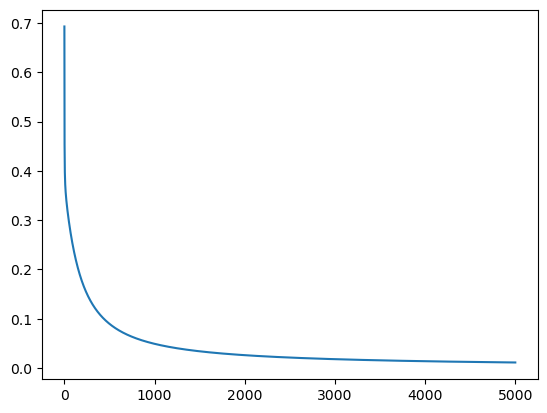

In [48]:
plt.plot(loss_epoch)


In [49]:
ones = np.ones((test_X.shape[0],1))
test_X= np.hstack((ones,test_X))
print(test_X.shape)

(400, 3)


In [55]:
def predict(X,theta):
    output = hypothesis(X,theta)
    y_pred = []
    for i in output:
        if i>=0.5:
            y_pred.append(1)
        else :
            y_pred.append(0)
    return np.array(y_pred)

    

In [57]:
test_pred = predict(test_X,theta)


In [59]:
for i in range(test_pred.shape[0]):
    print(test_pred[i],test_Y[i])

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.

In [61]:
np.sum(test_pred==test_Y)/test_pred.shape[0]

1.0